# Análise de Dados de Manaus com Foursquare

Vamos analisar dados do **Foursquare** da cidade de **Manaus** para respondermos as perguntas:

* Quais são os locais mais bem avaliados da cidade de Manaus no mês de Março?
* Quais são as categorias de lugares mais frequentados neste mesmo mês?

## Importação das bibliotecas

In [1]:
import gmplot
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Carregando as bases de dados

In [2]:
mao_2015_df = pd.read_csv("Data/Foursquare_MAO_MAR_2015", encoding = "utf-8")
mao_2016_df = pd.read_csv("Data/Foursquare_MAO_MAR_2016", encoding = "utf-8")
mao_2017_df = pd.read_csv("Data/Foursquare_MAO_MAR_2017", encoding = "utf-8")

## Fazendo perguntas

### 1. O que tem nos arquivos?

In [3]:
mao_2015_df.head(5)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
0,1425168058,-240,female,4b535772f964a520249827e3,-3.104187,-60.011926,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,258789,4111,9.0
1,1425168234,-240,female,54b06ea9498e668872a79d7b,-3.101788,-60.017451,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16c941735,Burger Joint,439,31,7.3
2,1425168242,-240,female,54580412498e633d7f5188af,-3.108907,-60.019625,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d104951735,Boutique,42,1,none
3,1425168257,-240,male,4ecc3b8161af1f8ac32f354a,-3.088108,-60.062357,Manaus,Brazil,4d4b7105d754a06375d81259,Professional & Other Places,4bf58dd8d48988d132941735,Church,6967,95,none
4,1425168263,-240,female,4b535772f964a520249827e3,-3.104187,-60.011926,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,258789,4111,9.0


In [4]:
mao_2016_df.head(5)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
0,1456790457,-240,male,4f95ee34e4b0b6acb1c9ed4a,-3.089442,-60.023889,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16e941735,Fast Food Restaurant,18513,607,8.2
1,1456790476,-240,male,4f5aa518e4b00747d9c58e36,-3.080699,-60.020168,none,Brazil,4d4b7105d754a06372d81259,College & University,4bf58dd8d48988d1a8941735,General College & University,1026,6,none
2,1456790551,-240,female,50edaf0be4b0f4fa74b4f77e,-3.104017,-60.007223,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d175941735,Gym / Fitness Center,1639,38,7.8
3,1456790567,-240,male,4d925f827ac3a35d4dbbbf25,-3.083414,-60.013292,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4f2a25ac4b909258e854f55f,Neighborhood,40811,166,none
4,1456790588,-240,male,4c31485f213c2d7f1bce335d,-3.082923,-60.009170,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d163941735,Park,20243,346,8.6


In [5]:
mao_2017_df.head(5)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
0,1488326411,-240,female,5659fd58498e4fd23916b76b,-3.103834,-60.012841,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d111941735,Japanese Restaurant,837,none,none
1,1488326418,-240,male,51ae18e7498e71ff43f38101,-3.132448,-59.987682,none,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d162941735,Other Great Outdoors,4071,none,none
2,1488326432,-240,male,53b18a0a498e6b0d6ea1075e,-3.129560,-59.987360,none,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d190941735,History Museum,38,none,none
3,1488326479,-240,male,5817c6c138fa5d1048fbb436,-3.129177,-59.986298,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,52e81612bcbc57f1066b7a14,Palace,37,none,none
4,1488326544,-240,none,575e0788498e492693417dfa,-3.091956,-60.045720,none,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1d2941735,Sushi Restaurant,407,none,none


In [6]:
frames = [mao_2015_df, mao_2016_df, mao_2017_df]
mao_df = pd.concat(frames)
mao_df

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
0,1425168058,-240,female,4b535772f964a520249827e3,-3.104187,-60.011926,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,258789,4111,9.0
1,1425168234,-240,female,54b06ea9498e668872a79d7b,-3.101788,-60.017451,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16c941735,Burger Joint,439,31,7.3
2,1425168242,-240,female,54580412498e633d7f5188af,-3.108907,-60.019625,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d104951735,Boutique,42,1,none
3,1425168257,-240,male,4ecc3b8161af1f8ac32f354a,-3.088108,-60.062357,Manaus,Brazil,4d4b7105d754a06375d81259,Professional & Other Places,4bf58dd8d48988d132941735,Church,6967,95,none
4,1425168263,-240,female,4b535772f964a520249827e3,-3.104187,-60.011926,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,258789,4111,9.0
5,1425168344,-240,male,52bba79e498e5d69657ae557,-3.124695,-60.008604,none,Brazil,4e67e38e036454776db1fb3a,Residence,4bf58dd8d48988d103941735,Home (private),743,0,none
6,1425168453,-240,none,53658b00498ee61c4d6f5ad5,-3.058496,-60.044966,none,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1ca941735,Pizza Place,52,2,none
7,1425168607,-240,female,4c2d2f35e307d13ad7710dda,-3.105087,-60.010712,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,52f2ab2ebcbc57f1066b8b42,Big Box Store,15493,309,6.0
8,1425168697,-240,female,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23260,1289,9.5
9,1425168876,-240,male,501c154ce4b01e9e71ba350e,-3.078257,-60.010819,Manaus,Brazil,4d4b7105d754a06374d81259,Food,5294c7523cf9994f4e043a62,Acai House,12,0,none


### 2. São quantos check-ins?

In [7]:
qtd_checkins_2015 = len(mao_2015_df)
qtd_checkins_2016 = len(mao_2016_df)
qtd_checkins_2017 = len(mao_2017_df)
qtd_checkins_total = len(mao_df)

In [8]:
print("2015: ", qtd_checkins_2015,
      "\n2016: ", qtd_checkins_2016,
      "\n2017: ", qtd_checkins_2017,
      "\nTotal: ", qtd_checkins_total)

2015:  20857 
2016:  15984 
2017:  9114 
Total:  45955


In [9]:
qtd_checkins = [qtd_checkins_2015, qtd_checkins_2016, qtd_checkins_2017]
anos = ["2015", "2016", "2017"]

Text(0,0.5,'# Check-ins')

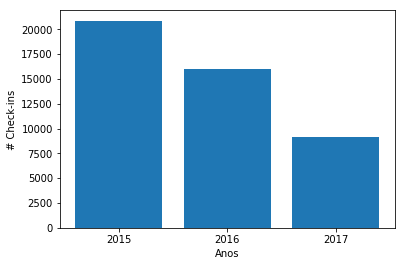

In [10]:
plt.bar(anos, qtd_checkins)
plt.xlabel("Anos")
plt.ylabel("# Check-ins")

### 3. Quantos locais existem nestes check-ins?

In [11]:
venues_2015 = mao_2015_df["VENUE ID"].unique()
venues_2016 = mao_2016_df["VENUE ID"].unique()
venues_2017 = mao_2017_df["VENUE ID"].unique()
venues_total = mao_df["VENUE ID"].unique()

In [12]:
print("2015: ", len(venues_2015), 
      "\n2016: ", len(venues_2016), 
      "\n2017: ", len(venues_2017),
      "\nTotal: ", len(venues_total))

2015:  4859 
2016:  4249 
2017:  3055 
Total:  9027


In [13]:
venues = [len(venues_2015), len(venues_2016), len(venues_2017)]
anos = ["2015", "2016", "2017"]

Text(0,0.5,'# Locais')

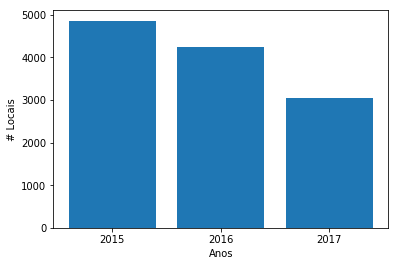

In [14]:
plt.bar(anos, venues)
plt.xlabel("Anos")
plt.ylabel("# Locais")

### 4. Quantos check-ins de cada gênero?

In [15]:
gender_total = pd.value_counts(mao_df["USER GENDER"], sort = True)
gender_total

male      24224
female    21153
none        578
Name: USER GENDER, dtype: int64

Text(0,0.5,'# Check-ins')

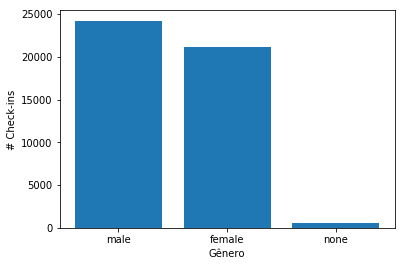

In [16]:
plt.bar(gender_total.keys(), gender_total)
plt.xlabel("Gênero")
plt.ylabel("# Check-ins")

In [17]:
gender_2015 = pd.value_counts(mao_2015_df["USER GENDER"], sort = True)
gender_2015

female    10725
male       9906
none        226
Name: USER GENDER, dtype: int64

Text(0,0.5,'# Check-ins')

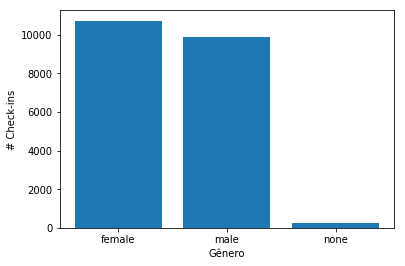

In [18]:
plt.bar(gender_2015.keys(), gender_2015)
plt.xlabel("Gênero")
plt.ylabel("# Check-ins")

In [19]:
gender_2016 = pd.value_counts(mao_2016_df["USER GENDER"], sort = True)
gender_2016

male      9029
female    6677
none       278
Name: USER GENDER, dtype: int64

Text(0,0.5,'# Check-ins')

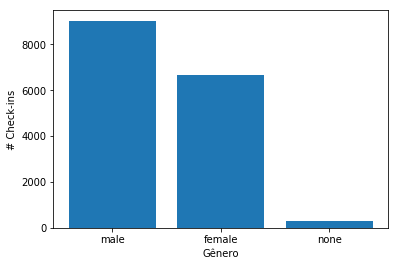

In [20]:
plt.bar(gender_2016.keys(), gender_2016)
plt.xlabel("Gênero")
plt.ylabel("# Check-ins")

In [21]:
gender_2017 = pd.value_counts(mao_2017_df["USER GENDER"], sort = True)
gender_2017

male      5289
female    3751
none        74
Name: USER GENDER, dtype: int64

Text(0,0.5,'# Check-ins')

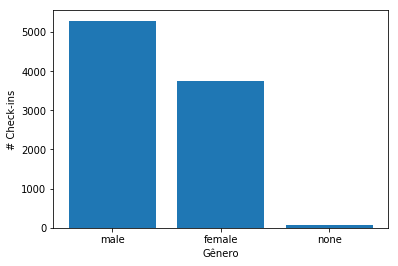

In [22]:
plt.bar(gender_2017.keys(), gender_2017)
plt.xlabel("Gênero")
plt.ylabel("# Check-ins")

### 5. Como estão distribuídos estes check-ins pela cidade?

**Observação**: os **mapas .html** gerados pelo **gmplot** não podem ser abertos diretamente pelo **Jupyter** (ocorre um erro). Desta forma, os mesmos devem ser abertos em um browser de sua preferência.

In [23]:
gmap = gmplot.GoogleMapPlotter(-3.044662,-59.967104, 12)

In [24]:
lats_total = mao_df["VENUE LATITUDE"]
long_total = mao_df["VENUE LONGITUDE"]
gmap.heatmap(lats_total, long_total)
gmap.draw("Maps/heatmap_total.html")

In [25]:
lats_2015 = mao_2015_df["VENUE LATITUDE"]
long_2015 = mao_2015_df["VENUE LONGITUDE"]
gmap.heatmap(lats_2015, long_2015)
gmap.draw("Maps/heatmap_2015.html")

In [26]:
lats_2016 = mao_2016_df["VENUE LATITUDE"]
long_2016 = mao_2016_df["VENUE LONGITUDE"]
gmap.heatmap(lats_2016, long_2016)
gmap.draw("Maps/heatmap_2016.html")

In [27]:
lats_2017 = mao_2017_df["VENUE LATITUDE"]
long_2017 = mao_2017_df["VENUE LONGITUDE"]
gmap.heatmap(lats_2017, long_2017)
gmap.draw("Maps/heatmap_2017.html")

### 6. De que categorias são estes check-ins?

In [28]:
categories_total = pd.value_counts(mao_df["VENUE MACRO-CATEGORY NAME"], sort = True)
categories_total

Residence                      10158
Professional & Other Places     8439
College & University            6334
Food                            5769
Shop & Service                  5703
Outdoors & Recreation           4149
Travel & Transport              2385
Arts & Entertainment            1508
Nightlife Spot                  1448
Event                             62
Name: VENUE MACRO-CATEGORY NAME, dtype: int64

Text(0,0.5,'# Check-ins')

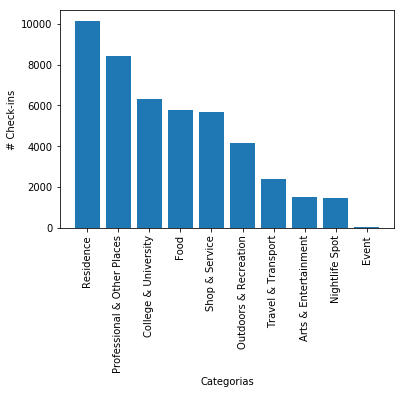

In [29]:
plt.bar(categories_total.keys(), categories_total)
plt.xticks(rotation=90)
plt.xlabel("Categorias")
plt.ylabel("# Check-ins")

In [30]:
categories_2015 = pd.value_counts(mao_2015_df["VENUE MACRO-CATEGORY NAME"], sort = True)
categories_2015

Residence                      5262
Professional & Other Places    3827
College & University           3212
Food                           2483
Shop & Service                 2178
Outdoors & Recreation          1713
Travel & Transport              831
Nightlife Spot                  758
Arts & Entertainment            569
Event                            24
Name: VENUE MACRO-CATEGORY NAME, dtype: int64

Text(0,0.5,'# Check-ins')

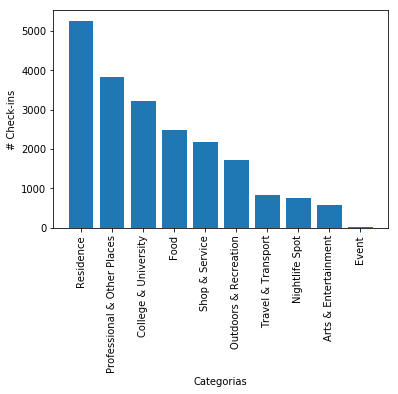

In [31]:
plt.bar(categories_2015.keys(), categories_2015)
plt.xticks(rotation=90)
plt.xlabel("Categorias")
plt.ylabel("# Check-ins")

In [32]:
categories_2016 = pd.value_counts(mao_2016_df["VENUE MACRO-CATEGORY NAME"], sort = True)
categories_2016

Residence                      3385
Professional & Other Places    2910
College & University           2053
Shop & Service                 2052
Food                           1865
Outdoors & Recreation          1566
Travel & Transport             1139
Arts & Entertainment            556
Nightlife Spot                  430
Event                            28
Name: VENUE MACRO-CATEGORY NAME, dtype: int64

Text(0,0.5,'# Check-ins')

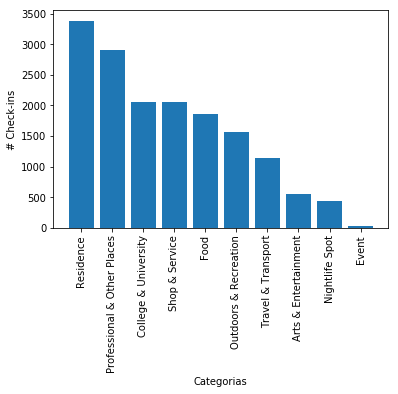

In [33]:
plt.bar(categories_2016.keys(), categories_2016)
plt.xticks(rotation=90)
plt.xlabel("Categorias")
plt.ylabel("# Check-ins")

In [34]:
categories_2017 = pd.value_counts(mao_2017_df["VENUE MACRO-CATEGORY NAME"], sort = True)
categories_2017

Professional & Other Places    1702
Residence                      1511
Shop & Service                 1473
Food                           1421
College & University           1069
Outdoors & Recreation           870
Travel & Transport              415
Arts & Entertainment            383
Nightlife Spot                  260
Event                            10
Name: VENUE MACRO-CATEGORY NAME, dtype: int64

Text(0,0.5,'# Check-ins')

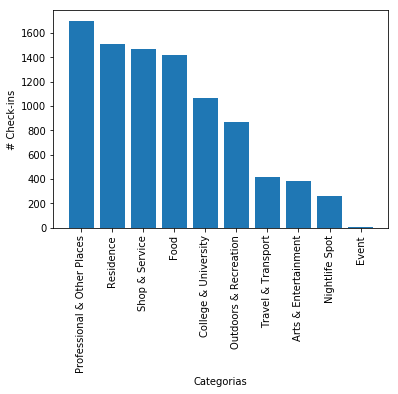

In [35]:
plt.bar(categories_2017.keys(), categories_2017)
plt.xticks(rotation=90)
plt.xlabel("Categorias")
plt.ylabel("# Check-ins")

### 7. E quais são as subcategorias?

In [36]:
subcat_total = pd.value_counts(mao_df["VENUE CATEGORY NAME"], sort = True).head(10)
subcat_total

Home (private)                              6483
University                                  2748
Residential Building (Apartment / Condo)    2340
Shopping Mall                               1984
Neighborhood                                1402
Housing Development                         1313
Road                                        1199
Office                                      1027
General College & University                 946
College Academic Building                    903
Name: VENUE CATEGORY NAME, dtype: int64

Text(0,0.5,'# Check-ins')

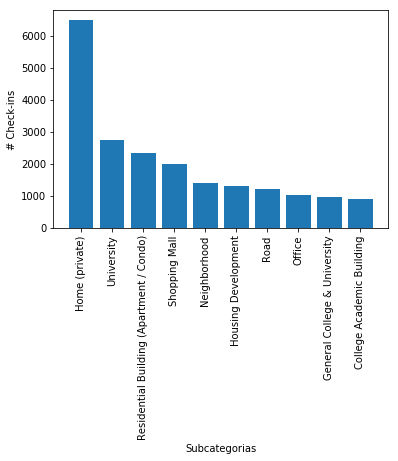

In [37]:
plt.bar(subcat_total.keys(), subcat_total)
plt.xticks(rotation=90)
plt.xlabel("Subcategorias")
plt.ylabel("# Check-ins")

In [38]:
subcat_2015 = pd.value_counts(mao_2015_df["VENUE CATEGORY NAME"], sort = True).head(10)
subcat_2015

Home (private)                              3737
University                                  1455
Residential Building (Apartment / Condo)     954
Shopping Mall                                926
Housing Development                          565
Neighborhood                                 500
Office                                       499
General College & University                 461
College Academic Building                    412
Church                                       410
Name: VENUE CATEGORY NAME, dtype: int64

Text(0,0.5,'# Check-ins')

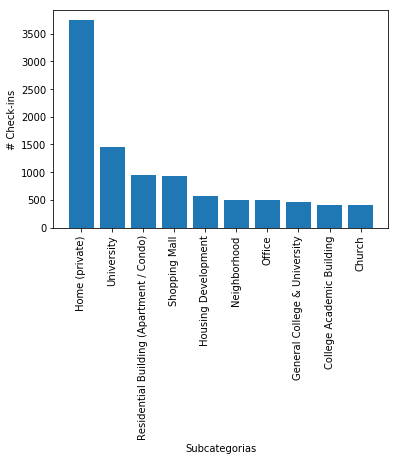

In [39]:
plt.bar(subcat_2015.keys(), subcat_2015)
plt.xticks(rotation=90)
plt.xlabel("Subcategorias")
plt.ylabel("# Check-ins")

In [40]:
subcat_2016 = pd.value_counts(mao_2016_df["VENUE CATEGORY NAME"], sort = True).head(10)
subcat_2016

Home (private)                              1928
Residential Building (Apartment / Condo)     918
University                                   834
Shopping Mall                                681
Road                                         651
Neighborhood                                 606
Housing Development                          532
General College & University                 346
College Academic Building                    331
Government Building                          309
Name: VENUE CATEGORY NAME, dtype: int64

Text(0,0.5,'# Check-ins')

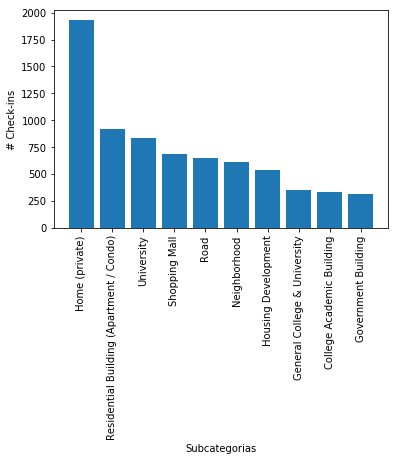

In [41]:
plt.bar(subcat_2016.keys(), subcat_2016)
plt.xticks(rotation=90)
plt.xlabel("Subcategorias")
plt.ylabel("# Check-ins")

In [42]:
subcat_2017 = pd.value_counts(mao_2017_df["VENUE CATEGORY NAME"], sort = True).head(10)
subcat_2017

Home (private)                              818
Residential Building (Apartment / Condo)    468
University                                  459
Shopping Mall                               377
Neighborhood                                296
Office                                      224
Housing Development                         216
Government Building                         175
Gym / Fitness Center                        175
Bakery                                      169
Name: VENUE CATEGORY NAME, dtype: int64

Text(0,0.5,'# Check-ins')

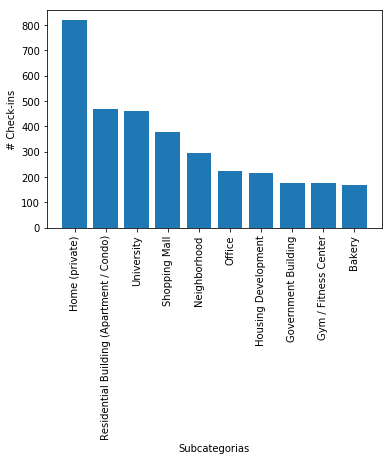

In [43]:
plt.bar(subcat_2017.keys(), subcat_2017)
plt.xticks(rotation=90)
plt.xlabel("Subcategorias")
plt.ylabel("# Check-ins")

Para aprender mais sobre as **categorias e subcategorias do Foursquare**, acesse: https://developer.foursquare.com/docs/resources/categories

### 8. Como ficariam os mapas de uma categoria específica?

In [44]:
food_df_total = mao_df.loc[mao_df['VENUE MACRO-CATEGORY NAME'] == "Food"]
food_df_total.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
1,1425168234,-240,female,54b06ea9498e668872a79d7b,-3.101788,-60.017451,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16c941735,Burger Joint,439,31,7.3
6,1425168453,-240,none,53658b00498ee61c4d6f5ad5,-3.058496,-60.044966,none,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1ca941735,Pizza Place,52,2,none
9,1425168876,-240,male,501c154ce4b01e9e71ba350e,-3.078257,-60.010819,Manaus,Brazil,4d4b7105d754a06374d81259,Food,5294c7523cf9994f4e043a62,Acai House,12,0,none
10,1425168921,-240,male,511845cbe4b01271856cda47,-3.000086,-59.990707,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1ca941735,Pizza Place,51,0,none
11,1425169091,-240,male,4eb5ece4775b544c27885ebe,-3.106641,-60.033748,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1c7941735,Snack Place,1500,59,5.8
12,1425169138,-240,female,4c94113f38dd8cfa0cbfc562,-3.063751,-60.057423,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d111941735,Japanese Restaurant,42,3,none
13,1425169220,-240,female,5334d143498e2f5d62956330,-3.085441,-60.025965,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1d2941735,Sushi Restaurant,1511,103,8.1
14,1425169299,-240,female,514fa86ee4b0a1834b768adc,-3.107690,-60.038509,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1c7941735,Snack Place,936,52,8.5
15,1425169299,-240,male,4f175676e4b0ba019490640a,-3.065652,-60.011539,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1d0941735,Dessert Shop,713,42,7.1
17,1425169545,-240,female,53caf2c3498edc8c0e4aa44a,-3.074036,-60.031542,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1d2941735,Sushi Restaurant,2655,102,8.2


In [45]:
lats_total = food_df_total["VENUE LATITUDE"]
long_total = food_df_total["VENUE LONGITUDE"]
gmap.heatmap(lats_total, long_total)
gmap.draw("Maps/heatmap_total_Food.html")

### 9. Quais são os locais mais bem avaliados da cidade?

In [46]:
mao_df_new = mao_df.loc[mao_df['VENUE RATING'] != "none"]
mao_df_new.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
0,1425168058,-240,female,4b535772f964a520249827e3,-3.104187,-60.011926,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,258789,4111,9.0
1,1425168234,-240,female,54b06ea9498e668872a79d7b,-3.101788,-60.017451,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16c941735,Burger Joint,439,31,7.3
4,1425168263,-240,female,4b535772f964a520249827e3,-3.104187,-60.011926,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,258789,4111,9.0
7,1425168607,-240,female,4c2d2f35e307d13ad7710dda,-3.105087,-60.010712,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,52f2ab2ebcbc57f1066b8b42,Big Box Store,15493,309,6.0
8,1425168697,-240,female,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23260,1289,9.5
11,1425169091,-240,male,4eb5ece4775b544c27885ebe,-3.106641,-60.033748,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1c7941735,Snack Place,1500,59,5.8
13,1425169220,-240,female,5334d143498e2f5d62956330,-3.085441,-60.025965,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1d2941735,Sushi Restaurant,1511,103,8.1
14,1425169299,-240,female,514fa86ee4b0a1834b768adc,-3.107690,-60.038509,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1c7941735,Snack Place,936,52,8.5
15,1425169299,-240,male,4f175676e4b0ba019490640a,-3.065652,-60.011539,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1d0941735,Dessert Shop,713,42,7.1
16,1425169526,-240,female,4f9b4fc8e4b02343c7aaa4e4,-3.111125,-60.007241,none,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d164941735,Plaza,1613,6,6.2


In [47]:
mao_df_new = mao_df_new.sort_values("VENUE RATING", ascending = False)
mao_df_new.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
6695,1457827778,-240,female,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23166,1282,9.6
3523,1457354295,-240,male,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23166,1282,9.6
13141,1458949282,-240,male,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23166,1282,9.6
3426,1489359154,-240,female,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23070,1278,9.6
15789,1427163010,-240,male,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23260,1289,9.6
2887,1489191425,-240,male,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23070,1278,9.6
6689,1457827111,-240,male,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23166,1282,9.6
6657,1457823753,-240,female,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23166,1282,9.6
17714,1427417957,-240,female,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23260,1289,9.6
16752,1427307913,-240,female,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23260,1289,9.6


In [48]:
mao_ranking = mao_df_new.drop_duplicates("VENUE ID").copy()
mao_ranking.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
6695,1457827778,-240,female,4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23166,1282,9.6
5496,1457644178,-240,male,4b62c956f964a520a7522ae3,-3.130686,-60.022839,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d164941735,Plaza,38812,688,9.5
6988,1457897636,-240,male,4b6b5677f964a520d9012ce3,-3.104127,-60.011834,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d114951735,Bookstore,21686,908,9.4
16311,1427238328,-240,female,4dcf0a267d8b975f18deea9f,-3.135920,-60.016656,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d163941735,Park,9289,183,9.3
8234,1490748272,-240,female,4bc5fd01db8fa593538d9b37,-3.074090,-60.031089,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1df931735,BBQ Joint,12743,703,9.3
6500,1457802109,-240,male,4b816a36f964a520bea430e3,-3.112166,-60.016682,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16b941735,Brazilian Restaurant,6758,602,9.3
6811,1490312120,-240,male,4da8990f5da3ef8bf16235f4,-3.107652,-60.020675,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d110951735,Salon / Barbershop,2112,64,9.3
4958,1425791668,-240,female,52faa201498e51f9d0c8fe8b,-3.066115,-60.098100,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d164941735,Plaza,5855,171,9.2
14712,1426995733,-240,female,4ba938faf964a520da153ae3,-3.099630,-60.015138,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16c941735,Burger Joint,9148,533,9.2
9861,1426415665,-240,female,4e74f5cf45ddd4323f862b3a,-3.083266,-60.028160,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d188941735,Soccer Stadium,18279,1049,9.2


In [49]:
pd.set_option("display.max_colwidth", -1)

In [50]:
mao_ranking_venue_id_links = "https://pt.foursquare.com/v/" + mao_ranking.loc[:, "VENUE ID"].astype(str)

In [51]:
mao_ranking.loc[:, "VENUE ID"] = mao_ranking_venue_id_links.values
mao_ranking.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
6695,1457827778,-240,female,https://pt.foursquare.com/v/4bb7be58314e95211ca2479d,-3.130264,-60.023149,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d137941735,Theater,23166,1282,9.6
5496,1457644178,-240,male,https://pt.foursquare.com/v/4b62c956f964a520a7522ae3,-3.130686,-60.022839,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d164941735,Plaza,38812,688,9.5
6988,1457897636,-240,male,https://pt.foursquare.com/v/4b6b5677f964a520d9012ce3,-3.104127,-60.011834,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d114951735,Bookstore,21686,908,9.4
16311,1427238328,-240,female,https://pt.foursquare.com/v/4dcf0a267d8b975f18deea9f,-3.135920,-60.016656,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d163941735,Park,9289,183,9.3
8234,1490748272,-240,female,https://pt.foursquare.com/v/4bc5fd01db8fa593538d9b37,-3.074090,-60.031089,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d1df931735,BBQ Joint,12743,703,9.3
6500,1457802109,-240,male,https://pt.foursquare.com/v/4b816a36f964a520bea430e3,-3.112166,-60.016682,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16b941735,Brazilian Restaurant,6758,602,9.3
6811,1490312120,-240,male,https://pt.foursquare.com/v/4da8990f5da3ef8bf16235f4,-3.107652,-60.020675,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d110951735,Salon / Barbershop,2112,64,9.3
4958,1425791668,-240,female,https://pt.foursquare.com/v/52faa201498e51f9d0c8fe8b,-3.066115,-60.098100,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d164941735,Plaza,5855,171,9.2
14712,1426995733,-240,female,https://pt.foursquare.com/v/4ba938faf964a520da153ae3,-3.099630,-60.015138,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16c941735,Burger Joint,9148,533,9.2
9861,1426415665,-240,female,https://pt.foursquare.com/v/4e74f5cf45ddd4323f862b3a,-3.083266,-60.028160,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d188941735,Soccer Stadium,18279,1049,9.2


In [52]:
night_df_total = mao_ranking.loc[mao_ranking["VENUE MACRO-CATEGORY NAME"] == "Nightlife Spot"]
night_df_total.head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
13118,1426823053,-240,male,https://pt.foursquare.com/v/4bb50ed02f70c9b6b5aa8330,-3.085044,-59.999363,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d11f941735,Nightclub,15544,556,9.1
15495,1459381238,-240,male,https://pt.foursquare.com/v/4f6f8f5be4b05c9c2cce19f8,-3.130586,-60.025991,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d116941735,Bar,4066,207,8.9
6773,1457836671,-240,male,https://pt.foursquare.com/v/52fc455a498e1d344b0d6633,-3.066544,-60.012222,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,50327c8591d4c4b30a586d5d,Brewery,3231,265,8.8
11663,1426643289,-240,female,https://pt.foursquare.com/v/4bca0fa2b6c49c74c3a68f91,-3.080909,-60.010135,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d116941735,Bar,14426,649,8.7
5012,1489800108,-240,male,https://pt.foursquare.com/v/4d8f7daac1b1721e8bb34746,-3.103714,-60.012135,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,50327c8591d4c4b30a586d5d,Brewery,18758,875,8.7
12867,1458878999,-240,male,https://pt.foursquare.com/v/4bc96f87937ca593d9d9a592,-3.131965,-60.023389,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d11f941735,Nightclub,6556,256,8.7
13507,1459037930,-240,male,https://pt.foursquare.com/v/5094660de4b0faafd2db2fca,-3.091913,-60.045298,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d116941735,Bar,4206,241,8.6
14114,1426914749,-240,male,https://pt.foursquare.com/v/53d31681498e7657f446e629,-3.121944,-60.020916,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d11b941735,Pub,400,27,8.6
6363,1457759496,-240,male,https://pt.foursquare.com/v/4effca6da69d45461d9afcbd,-3.051825,-60.078089,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,50327c8591d4c4b30a586d5d,Brewery,16727,546,8.5
1188,1456966664,-240,male,https://pt.foursquare.com/v/54fb988e498e1fc140fa7858,-3.087866,-59.996883,Manaus,Brazil,4d4b7105d754a06376d81259,Nightlife Spot,4bf58dd8d48988d116941735,Bar,1383,88,8.5


### 10. Quais são as categorias de lugares mais frequentados?

In [53]:
mao_ranking.sort_values("CHECK-INS COUNT", ascending = False).head(10)

,CREATED AT,TIME ZONE OFFSET,USER GENDER,VENUE ID,VENUE LATITUDE,VENUE LONGITUDE,CITY,COUNTRY,VENUE MACRO-CATEGORY ID,VENUE MACRO-CATEGORY NAME,VENUE CATEGORY ID,VENUE CATEGORY NAME,CHECK-INS COUNT,VENUE LIKES,VENUE RATING
1201,1488744621,-240,female,https://pt.foursquare.com/v/4b535772f964a520249827e3,-3.104079,-60.011790,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,257161,4085,9.0
1503,1488828595,-240,female,https://pt.foursquare.com/v/4b5d08a1f964a520c64f29e3,-3.031961,-60.046039,Manaus,Brazil,4d4b7105d754a06379d81259,Travel & Transport,4bf58dd8d48988d1ed931735,Airport,180908,1539,6.7
1596,1425390372,-240,female,https://pt.foursquare.com/v/4b983bf7f964a520213635e3,-3.094191,-60.023019,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,157927,2781,8.4
2074,1457106929,-240,male,https://pt.foursquare.com/v/4b885e75f964a520aef231e3,-3.101026,-60.025170,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,70388,1415,8.0
10121,1426458048,-240,female,https://pt.foursquare.com/v/4ea4f8e98b81a02f8aa555d2,-3.084998,-60.072558,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,51341,1845,8.5
7638,1457997462,-240,male,https://pt.foursquare.com/v/4b4778e2f964a520273326e3,-3.097422,-60.023646,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,49887,1035,7.1
5496,1457644178,-240,male,https://pt.foursquare.com/v/4b62c956f964a520a7522ae3,-3.130686,-60.022839,Manaus,Brazil,4d4b7105d754a06377d81259,Outdoors & Recreation,4bf58dd8d48988d164941735,Plaza,38812,688,9.5
11245,1458605554,-240,male,https://pt.foursquare.com/v/4b5a3fd4f964a52069b728e3,-3.125029,-59.983454,Manaus,Brazil,4d4b7105d754a06378d81259,Shop & Service,4bf58dd8d48988d1fd941735,Shopping Mall,37202,809,7.7
12353,1458790190,-240,male,https://pt.foursquare.com/v/4c81cad12f1c236a9ec63343,-3.095098,-60.051132,Manaus,Brazil,4d4b7104d754a06370d81259,Arts & Entertainment,4bf58dd8d48988d1e9931735,Rock Club,29449,1325,9.1
13940,1459131858,-240,male,https://pt.foursquare.com/v/4ba368bdf964a520c53a38e3,-3.108067,-60.023601,Manaus,Brazil,4d4b7105d754a06374d81259,Food,4bf58dd8d48988d16e941735,Fast Food Restaurant,26506,783,8.2
